# تا حد امکان ، باز نمایش دوربین ها در صفحه 

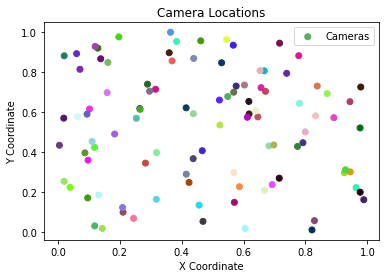

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# خواندن دیتاست
df = pd.read_csv('Data_p1.csv')

# تعداد دوربین‌ها
num_cameras = 100

# تولید مختصات تصادفی برای دوربین‌ها
np.random.seed(0)
x_coordinates = np.random.rand(num_cameras)
y_coordinates = np.random.rand(num_cameras)

# رسم دوربین‌ها در صفحه با رنگ‌های تصادفی
plt.scatter(x_coordinates, y_coordinates, c=np.random.rand(num_cameras, 3), label='Cameras')

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Camera Locations')
plt.legend()
plt.show()


## تخمین زدن فاصله ای بین دوربین ها از میزان فاصله زمانی

## نمایش فاصله میان دوربین ها

In [8]:
import pandas as pd

# خواندن داده‌ها
df = pd.read_csv('Data_p1.csv')

# متوسط سرعت
AVERAGE_SPEED = 60  # به عنوان مثال، فرض کنید سرعت متوسط 60 کیلومتر در ساعت است

# محاسبه فاصله میان دوربین‌ها بر اساس فاصله زمانی و سرعت متوسط
df['DISTANCE'] = 1 / (df['PASSDATETIME'].diff() * AVERAGE_SPEED)

#   'Distance'
df.rename(columns={'DISTANCE': 'Distance'}, inplace=True)

# نمایش فاصله میان دوربین‌ها
print(df)


         Unnamed: 0  DEVICEID    vehicleId  PASSDATETIME      Distance
0                 0    101610  40321227460        307695           NaN
1                 1    101827  97316881507        307704  1.851852e-03
2                 2     76431  37948514480        307653 -3.267974e-04
3                 3     74093  86086297520        307671  9.259259e-04
4                 4     99895  49049583630        307836  1.010101e-04
...             ...       ...          ...           ...           ...
5999995     5999995     37385  41569730560        377095  1.960784e-04
5999996     5999996     43881  60215825530        305667 -2.333352e-07
5999997     5999997     43881  60438593730        305544 -1.355014e-04
5999998     5999998     42726  67401542877        377055  2.330644e-07
5999999     5999999     42572  73905685130        377056  1.666667e-02

[6000000 rows x 5 columns]


C:\Users\lenovo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


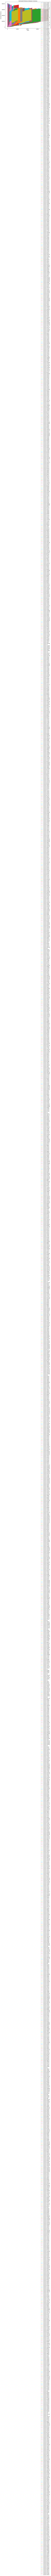

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# خواندن دیتاست
df = pd.read_csv('Data_p1.csv')

# مرتب‌سازی بر اساس زمان گذشته شده
df_sorted = df.sort_values('PASSDATETIME', ascending=True)

# تخمین زدن فاصله بین دوربین‌ها
distances = {}

for index, row in df_sorted.iterrows():
    camera_id = row['DEVICEID']
    passdatetime = row['PASSDATETIME']

    if camera_id in distances:
        prev_passdatetime = distances[camera_id][-1]
        time_diff = passdatetime - prev_passdatetime
        distances[camera_id].append(time_diff)
    else:
        distances[camera_id] = [passdatetime]

# نمایش تخمین فاصله بین دوربین‌ها در یک نمودار
fig, ax = plt.subplots(figsize=(10, 6))

for camera_id, time_diffs in distances.items():
    ax.plot(time_diffs, label=f"Camera {camera_id}")

ax.set_xlabel('Index')
ax.set_ylabel('Estimated Distance')
ax.set_title('Estimated Distance between Cameras')
ax.legend()
plt.show()
